### Confronto tra stazioni

In [ ]:
install.packages('dplyr')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


In [ ]:
library('dplyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Clean variables previously defined
rm(list=ls())

# READING DATA ==============================================

# Define the input filenames and assign them to a variable
StationDataFile <- "Data/StationData_A.txt"


# Read data as a table and assigning to the variable called 'StationData'
StationData <- read.table(file(StationDataFile),
                          sep = "", # separate columns by space
                          na.string = NA, # tag empty values as "NA"
                          as.is = TRUE, # convert character to factors
                          header = FALSE, # ignore the header
                          skip = 1, # skip the first row
                          col.names = c("Date","Time","Interval",
                                        "Press","inTemp","outTemp",
                                        "inHum","outHum","wndSpeed",
                                        "wndDir","windGust","wGstDir",
                                        "rainRate","rain","dewpoint",
                                        "wdChill","heatIndx","ET",
                                        "totRad","UV")
                            )

cat('Dimension of the matrix = ', dim(StationData))

# DATE FORMAT ===============================================
# Define 1st and 2nd columns as a String and split into 5 columns
Temp <- t(rbind(as.numeric(substr(StationData[,1],1,4)), # year
          as.numeric(substr(StationData[,1],5,6)), # month
          as.numeric(substr(StationData[,1],7,8)), # day
          floor(StationData[,2]), # hour
          round(100*(StationData[,2] %%1)) # minutes
          ))

# Define names to rows and columns
colnames(Temp) <- c("Year","Month","Day","Hour","Minutes")
rownames(Temp) <- 1:dim(Temp)[1]

# Replace the new date format (2 cols > 5 cols) and keep only the WindRose variables
StationData <- cbind(Temp, StationData[,9:10])

# Record the length of data
#LenSD <- dim(StationData)[1]

#StationData[1:6,]

#cat("Available Data for Station A:", LenSD)


Dimension of the matrix =  264347 20

In [ ]:
spring_A = read.table('ProcessedData/DataCONS_springA.txt', col.names = c('num', 'perc'))
spring_B = read.table('ProcessedData/DataCONS_springB.txt', col.names = c('num', 'perc'))
spring_C = read.table('ProcessedData/DataCONS_springC.txt', col.names = c('num', 'perc'))

winter_A = read.table('ProcessedData/DataCONS_winterA.txt', col.names = c('num', 'perc'))
winter_B = read.table('ProcessedData/DataCONS_winterB.txt', col.names = c('num', 'perc'))
winter_C = read.table('ProcessedData/DataCONS_winterC.txt', col.names = c('num', 'perc'))

In [ ]:
spring_av = c(spring_A$num[1], spring_B$num[1], spring_C$num[1])
spring_valid = c(spring_A$num[2], spring_B$num[2], spring_C$num[2])

winter_av = c(winter_A$num[1], winter_B$num[1], winter_C$num[1])
winter_valid = c(winter_A$num[2], winter_B$num[2], winter_C$num[2])

In [ ]:
spring_A

,num,perc
,<int>,<int>
Available,6621,100
Valid,5111,77
Filtered,1510,23
> by WSneg,0,0
> by WSstrong,0,0
> by WDNeg,12,0
> by WSC12,1197,18
> by WDC,301,5


In [ ]:

options(repr.plot.width = 15, repr.plot.height = 7)
pdf('Plots/available_vs_valid_data.pdf', width = 15, height = 7)
par(mfrow = c(1,2))

barplot(winter_av, names.arg = c('A', 'B', 'C'), main = 'Dati disponibili vs dati filtrati - Inverno', density = 20, col = 'darkslategray2', ylab= 'N', xlab = 'Stazioni', cex.main = 1.5)
barplot(winter_valid, add = T, col = 'darkslategray1')
text(0.7,winter_A$num[2]/2, paste(winter_A$perc[2], '%'), cex = 2)
text(1.9,winter_B$num[2]/2, paste(winter_B$perc[2], '%'), cex = 2)
text(3.1,winter_C$num[2]/2, paste(winter_C$perc[2], '%'), cex = 2)


barplot(spring_av, names.arg = c('A', 'B', 'C'), main = 'Dati disponibili vs dati filtrati - Primavera', density = 20, col = 'plum', ylab = 'N', xlab = 'Stazioni', cex.main = 1.5)
barplot(spring_valid, add = T, col = 'plum1')
text(0.7,spring_A$num[2]/2, paste(spring_A$perc[2], '%'), cex = 2)
text(1.9,spring_B$num[2]/2, paste(spring_B$perc[2], '%'), cex = 2)
text(3.1,spring_C$num[2]/2, paste(spring_C$perc[2], '%'), cex = 2)
dev.off()


png 
  2

In [ ]:
#spring_filt = matrix(c(spring_A$num[4:8]/spring_A$num[3]*100, spring_B$num[4:8]/spring_B$num[3]*100, spring_C$num[4:8]/spring_C$num[3]*100), nrow=5, ncol=3,
#        dimnames = list(c('WSneg', 'WSstrong', 'WDneg', 'WSC12h', 'WDC18h'), c('A', 'B', 'C')))

winter_filt = matrix(c(winter_A$perc[4:8], winter_B$perc[4:8], winter_C$perc[4:8]), nrow=5, ncol=3,
        dimnames = list(c('WSneg', 'WSstrong', 'WDneg', 'WSC12h', 'WDC18h'), c('A', 'B', 'C')))

spring_filt = matrix(c(spring_A$perc[4:8], spring_B$perc[4:8], spring_C$perc[4:8]), nrow=5, ncol=3,
        dimnames = list(c('WSneg', 'WSstrong', 'WDneg', 'WSC12h', 'WDC18h'), c('A', 'B', 'C')))

In [ ]:
pdf('excluded_data_by_filter.pdf', height = 7, width = 15)
par(mfrow = c(1,2))

#op <- par(cex = 1.5)
barplot(winter_filt, col = c('#e66101', '#fdb863', '#f7f7f7', '#b2abd2', '#5e3c99'), main = 'Dati esclusi per tipo di filtro - Inverno', ylim=c(0,60), 
       cex.main = 1.5, ylab = '%', xlab = 'Stazione', cex.lab = 1.5)
legend("top", cex = 1,
       legend = c('WSneg', 'WSstrong', 'WDneg', 'WSC12h', 'WDC18h'),
       fill = c('#e66101', '#fdb863', '#f7f7f7', '#b2abd2', '#5e3c99'))


barplot(spring_filt, col = c('#e66101', '#fdb863', '#f7f7f7', '#b2abd2', '#5e3c99'), main = 'Dati esclusi per tipo di filtro - Primavera', ylim=c(0,60), 
       cex.main = 1.5, ylab = '%', xlab = 'Stazione', cex.lab = 1.5)
legend("top", cex = 1,
       legend = c('WSneg', 'WSstrong', 'WDneg', 'WSC12h', 'WDC18h'),
       fill = c('#e66101', '#fdb863', '#f7f7f7', '#b2abd2', '#5e3c99'))
dev.off()


png 
  2

## Analisi rigetti comuni

In [ ]:
W_wsc_A = read.table('ProcessedData/A/excluded/Winter_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))

S_wsc_A = read.table('ProcessedData/A/excluded/Spring_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))


W_wsc_B = read.table('ProcessedData/B/excluded/Winter_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))

S_wsc_B = read.table('ProcessedData/B/excluded/Spring_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))


W_wsc_C = read.table('ProcessedData/C/excluded/Winter_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))

S_wsc_C = read.table('ProcessedData/C/excluded/Spring_ExcWSC.txt', col.names = c('AbsTIME', 'Year', 'Month', 'Day', 'Hour', 'Min', 'wndSpeed', 'wndDir'))


In [ ]:
row.names(W_wsc_A) = 1:dim(W_wsc_A)[1]

In [ ]:
W_wsc_A

,AbsTIME,Year,Month,Day,Hour,Min,wndSpeed,wndDir
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,16770,2015,12,1,9,0,0.894,90.0
2,16770,2015,12,1,10,0,0.894,90.0
3,16770,2015,12,1,11,0,0.894,22.5
4,16770,2015,12,1,12,0,0.894,337.5
5,16771,2015,12,1,13,0,0.894,337.5
6,16771,2015,12,1,14,0,0.894,0.0
7,16771,2015,12,1,15,0,0.447,90.0
8,16771,2015,12,1,16,0,0.000,90.0
9,16771,2015,12,1,17,0,0.447,90.0


In [ ]:
a = merge(W_wsc_A, W_wsc_B, by=c('Year', 'Month', 'Day', 'Hour'))

In [ ]:
a

Year,Month,Day,Hour,AbsTIME.x,Min.x,wndSpeed.x,wndDir.x,AbsTIME.y,Min.y,wndSpeed.y,wndDir.y
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
2015,12,1,11,16770,0,0.894,22.5,16770,0,0.894,0.0
2015,12,1,12,16770,0,0.894,337.5,16770,0,0.894,0.0
2015,12,1,13,16771,0,0.894,337.5,16771,0,1.341,0.0
2015,12,1,14,16771,0,0.894,0.0,16771,0,0.894,0.0
2015,12,1,15,16771,0,0.447,90.0,16771,0,0.447,67.5
2015,12,1,16,16771,0,0.000,90.0,16771,0,0.447,45.0
2015,12,1,17,16771,0,0.447,90.0,16771,0,0.894,45.0
2015,12,1,18,16771,0,0.447,90.0,16771,0,0.894,112.5
2015,12,1,19,16771,0,0.000,90.0,16771,0,0.447,135.0


In [ ]:
dim(W_wsc_A)
dim(W_wsc_B)

[1] 2804    8

[1] 1573    8

In [ ]:
a

Year,Month,Day,Hour,AbsTIME.x,Min.x,wndSpeed.x,wndDir.x,AbsTIME.y,Min.y,wndSpeed.y,wndDir.y
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
2015,12,1,11,16770,0,0.894,22.5,16770,0,0.894,0.0
2015,12,1,12,16770,0,0.894,337.5,16770,0,0.894,0.0
2015,12,1,13,16771,0,0.894,337.5,16771,0,1.341,0.0
2015,12,1,14,16771,0,0.894,0.0,16771,0,0.894,0.0
2015,12,1,15,16771,0,0.447,90.0,16771,0,0.447,67.5
2015,12,1,16,16771,0,0.000,90.0,16771,0,0.447,45.0
2015,12,1,17,16771,0,0.447,90.0,16771,0,0.894,45.0
2015,12,1,18,16771,0,0.447,90.0,16771,0,0.894,112.5
2015,12,1,19,16771,0,0.000,90.0,16771,0,0.447,135.0


In [ ]:
y1_A = dim(dplyr::filter(W_wsc_A, W_wsc_A$Year == 2015))[1]
y2_A = dim(dplyr::filter(W_wsc_A, W_wsc_A$Year == 2016))[1]
y3_A = dim(dplyr::filter(W_wsc_A, W_wsc_A$Year == 2017))[1]
y4_A = dim(dplyr::filter(W_wsc_A, W_wsc_A$Year == 2018))[1]

In [ ]:
y1_B = dim(dplyr::filter(W_wsc_B, W_wsc_B$Year == 2015))[1]
y2_B = dim(dplyr::filter(W_wsc_B, W_wsc_B$Year == 2016))[1]
y3_B = dim(dplyr::filter(W_wsc_B, W_wsc_B$Year == 2017))[1]
y4_B = dim(dplyr::filter(W_wsc_B, W_wsc_B$Year == 2018))[1]

In [ ]:
y1_C = dim(dplyr::filter(W_wsc_C, W_wsc_C$Year == 2015))[1]
y2_C = dim(dplyr::filter(W_wsc_C, W_wsc_C$Year == 2016))[1]
y3_C = dim(dplyr::filter(W_wsc_C, W_wsc_C$Year == 2017))[1]
y4_C = dim(dplyr::filter(W_wsc_C, W_wsc_C$Year == 2018))[1]

In [ ]:
year = c('2015', '2016', '2017', '2018')
data_W = matrix(c(y1_A, y2_A, y3_A, y4_A, y1_B, y2_B, y3_B, y4_B, y1_C, y2_C, y3_C, y4_C), nrow = 4, ncol = 3, dimnames = list(year, c('A', 'B', 'C'))) 
data_W = t(data_W)

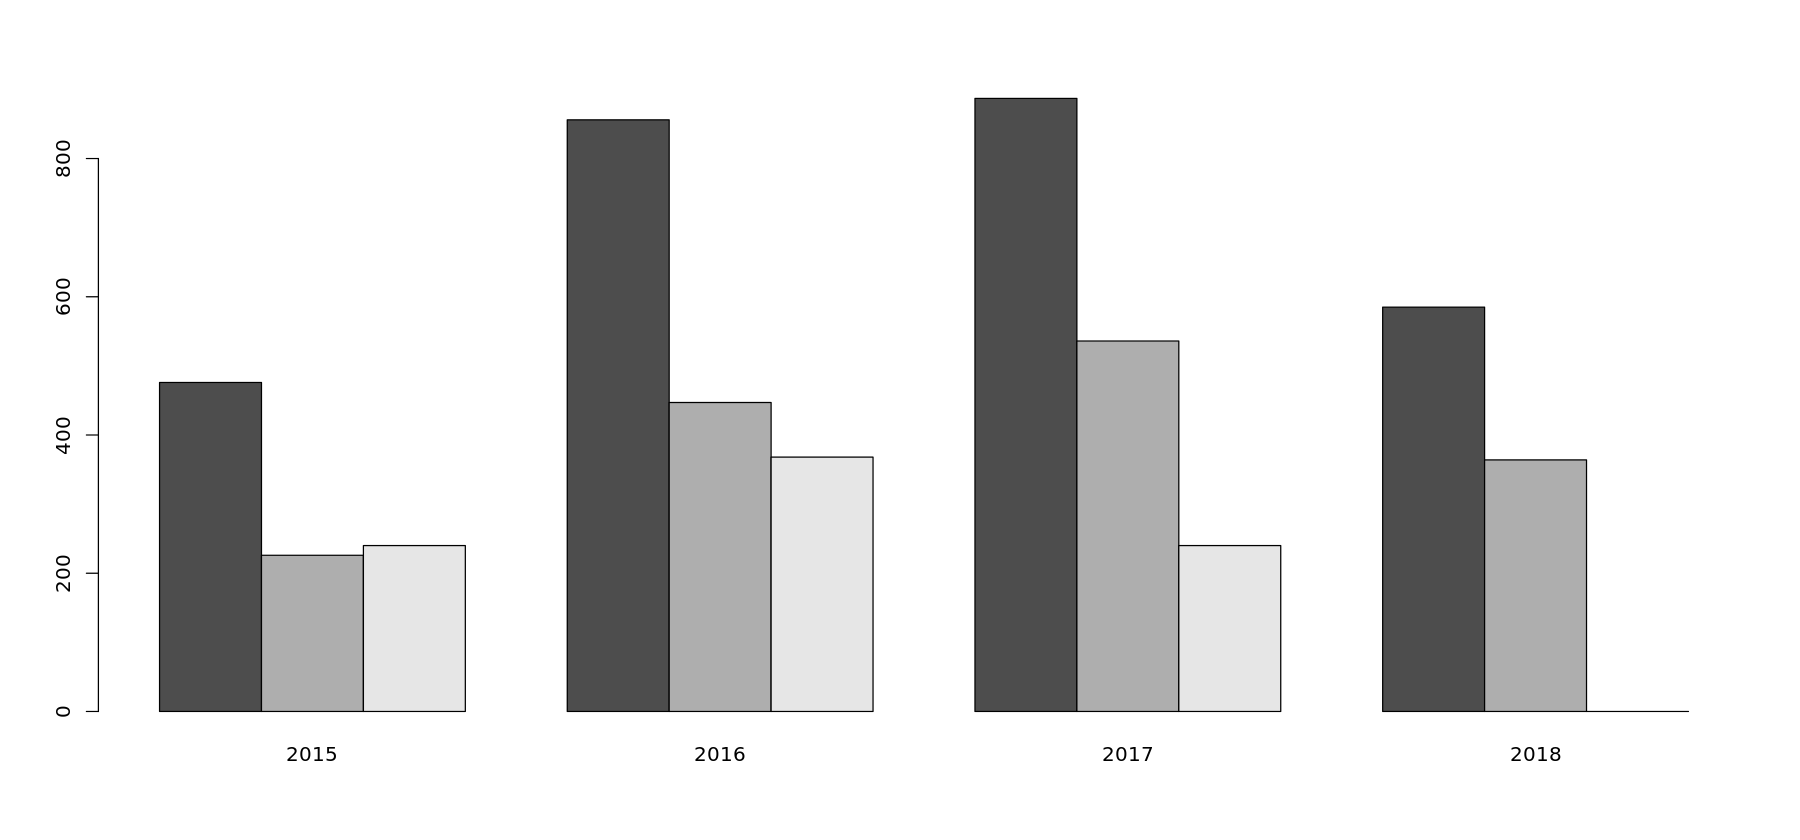

In [ ]:
barplot(data_W, beside = TRUE)

In [ ]:
W_wsc_A = W_wsc_A %>% select(Year, Month, Day, Hour, wndSpeed, wndDir)%>% mutate(row = 1:dim(W_wsc_A)[1])
W_wsc_B = W_wsc_B %>% select(Year, Month, Day, Hour, wndSpeed, wndDir) %>% mutate(row = 1:dim(W_wsc_B)[1])
W_wsc_C = W_wsc_C %>% select(Year, Month, Day, Hour, wndSpeed, wndDir) %>% mutate(row = 1:dim(W_wsc_C)[1])

common = merge(W_wsc_A, W_wsc_B, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'B', 'C'))

# C è brutalmente fallata (molti dati filtrati per negatività),
# quindi considererei solo A e B per l'analisi di rigetto
#common = merge(common, W_wsc_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'B', 'C'))

In [ ]:
common

Year,Month,Day,Hour,wndSpeedA,wndDirA,rowA,wndSpeedB,wndDirB,rowB
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
2015,12,1,11,0.894,22.5,3,0.894,0.0,1
2015,12,1,12,0.894,337.5,4,0.894,0.0,2
2015,12,1,13,0.894,337.5,5,1.341,0.0,3
2015,12,1,14,0.894,0.0,6,0.894,0.0,4
2015,12,1,15,0.447,90.0,7,0.447,67.5,5
2015,12,1,16,0.000,90.0,8,0.447,45.0,6
2015,12,1,17,0.447,90.0,9,0.894,45.0,7
2015,12,1,18,0.447,90.0,10,0.894,112.5,8
2015,12,1,19,0.000,90.0,11,0.447,135.0,9


In [ ]:
dim(W_wsc_A)[1]
dim(W_wsc_B)[1]
dim(common)[1]

[1] 2804

[1] 1573

[1] 1489

In [ ]:
W_common_A = common[,1:6]
W_common_A = W_common_A %>% rename(wndSpeed = wndSpeedA) %>% rename(wndDir = wndDirA)

W_common_B = cbind(common[,1:4], common[,8:9])
W_common_B = W_common_B %>% rename(wndSpeed = wndSpeedB) %>% rename(wndDir = wndDirB)

write.table(W_common_A, paste0('ProcessedData/A/','common.txt'),
                            sep = "\t", row.names=FALSE, col.names=FALSE)
write.table(W_common_B, paste0('ProcessedData/B/','common.txt'),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

In [ ]:
c = common %>% group_by(Year, Month, Day) %>% summarise(entries = n())  %>% arrange(desc(entries))
# Visualizzazione dei giorni di maggior rigetto
head(c)

`summarise()` has grouped output by 'Year', 'Month'. You can override using the `.groups` argument.



Year,Month,Day,entries
<int>,<int>,<int>,<int>
2016,2,15,23
2016,12,9,23
2016,2,25,22
2016,12,15,22
2017,1,19,22
2017,2,2,22


In [ ]:
bp = common %>% group_by(Year, Month) %>% summarise(entries = n())
bp

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



Year,Month,entries
<int>,<int>,<int>
2015,12,222
2016,1,89
2016,2,91
2016,12,245
2017,1,219
2017,2,183
2017,12,88
2018,1,180
2018,2,172


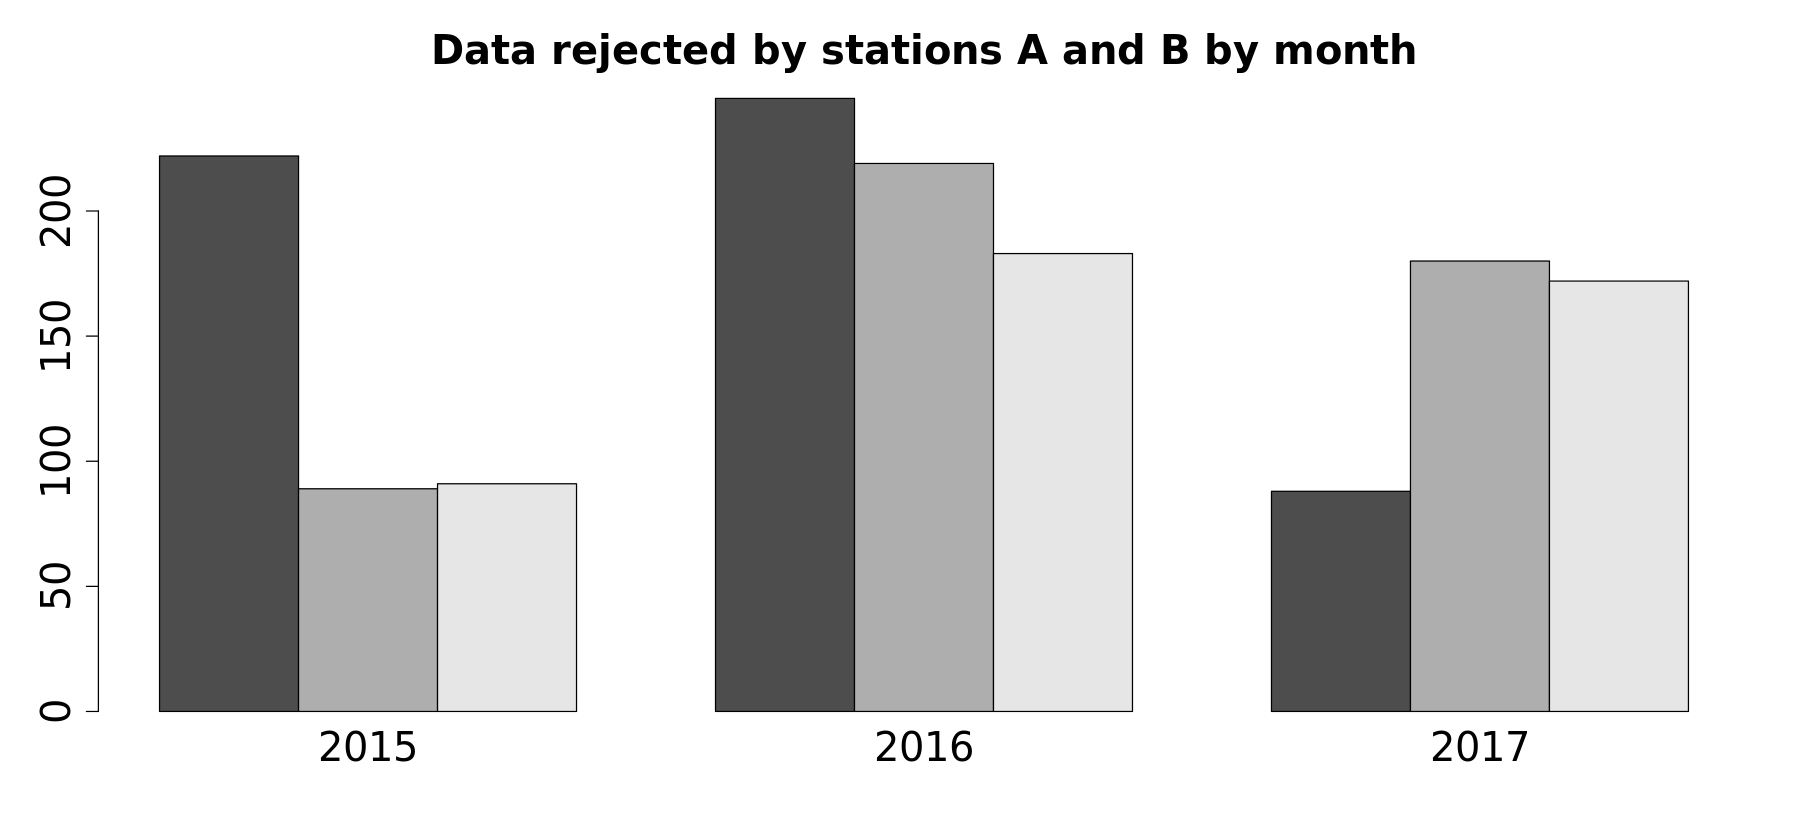

In [ ]:
t = matrix(bp$entries, nrow = 3, ncol = 3)

#par(mar = c(2,4,4,4))
b= barplot(t, beside = TRUE, main = 'Data rejected by stations A and B by month', names.arg = c('2015', '2016', '2017'), cex.main = 2, cex.names = 2, cex.axis = 2)

#axis(1,at=b, labels=c('Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb'))


In [ ]:
# Il problema sta nel fatto che la stazione A 
# rigetta molti più dati per WSC.
# Noi scegliamo come studio successivo la stazione B.

# Guardando i dati in comune tra A e B si vede che 
# la maggior parte dei rigettati di B è in comune con A.

# Si potrebbe pensare di reintrodurre questi dati?

In [ ]:
not_common_A = W_wsc_A[-common$rowA,]
not_common_B = W_wsc_B[-common$rowB,]

In [ ]:
a1 = not_common_A %>% group_by(Year, Month, Day) %>% summarise(entries = n())  %>% arrange(desc(entries))
a2 = not_common_B %>% group_by(Year, Month, Day) %>% summarise(entries = n())  %>% arrange(desc(entries))

`summarise()` has grouped output by 'Year', 'Month'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Year', 'Month'. You can override using the `.groups` argument.



In [ ]:
head(a1)
head(a2)

Year,Month,Day,entries
<int>,<int>,<int>,<int>
2015,12,5,24
2016,1,24,24
2015,12,15,23
2016,1,30,23
2016,12,25,23
2017,2,7,23


Year,Month,Day,entries
<int>,<int>,<int>,<int>
2017,2,17,12
2017,12,9,12
2017,2,12,10
2016,2,21,9
2016,1,9,4
2018,2,16,4


In [ ]:
# Il rigetto di dati in B avviene in giorni specifici

In [ ]:
lm(common$wndSpeedB ~ common$wndSpeedA)


Call:
lm(formula = common$wndSpeedB ~ common$wndSpeedA)

Coefficients:
     (Intercept)  common$wndSpeedA  
           0.367             1.051  


In [ ]:
corr_coef = function(data1, data2) {
    a = sum(( data1 - mean(data1) )*( data2 - mean(data2) ) )/( sqrt(sum((data1 - mean(data1))**2))*sqrt(sum((data2 - mean(data2))**2)) )
    return(a)
}

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
pdf('Plots/correlation_rejected_data.pdf', width=10, height=10)
plot(common$wndSpeedA, common$wndSpeedB, main = 'Correlazione tra dati rigettati (Stazione A e B)',
        ylab = 'Velocità B (m/s)', xlab = 'Velocità A (m/s)', cex.main = 2, cex.lab = 1.5, xlim = c(0,7), ylim = c(0,7))
lines(seq(-1,10,0.1), seq(-1,10,0.1), col = 'darkgrey', lwd=2, lty=2)
abline(a, col = 'red', lwd=2 )

a = lm(common$wndSpeedB  ~ common$wndSpeedA)
intercept = as.character(round(a$coefficients[1], digits = 2))
slope = as.character(round(a$coefficients[2], digits=2))


text(3,1, paste0('y = ', slope,'x + ', intercept), cex = 2, col = 'red')
text(3,0.5, paste0('r = ', round(corr_coef(common$wndSpeedA, common$wndSpeedB), digits = 2)), cex = 2)
dev.off()

png 
  2

## Correlazione tra stazioni

In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')
install.packages('gplots')
library('gplots')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [ ]:
winter_A = read.table('ProcessedData/A/Winter_A_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir')) %>% select(c('Year', 'Month', 'Day', 'Hour', 'wndSpeed', 'wndDir'))
winter_B = read.table('ProcessedData/B/Winter_B_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir')) %>% select(c('Year', 'Month', 'Day', 'Hour', 'wndSpeed', 'wndDir'))
winter_C = read.table('ProcessedData/C/Winter_C_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir')) %>% select(c('Year', 'Month', 'Day', 'Hour', 'wndSpeed', 'wndDir'))


In [ ]:
common = merge(winter_A, winter_B, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'B'))
common = merge(common, winter_C, by = c('Year', 'Month', 'Day', 'Hour'), suffixes = c('A', 'B', 'C'))
common = common %>% rename(wndSpeedC = wndSpeed) %>% rename(wndDirC = wndDir)

In [ ]:
common

Year,Month,Day,Hour,wndSpeedA,wndDirA,wndSpeedB,wndDirB,wndSpeedC,wndDirC
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,12,1,0,0.894,270.0,0.894,0.0,0.000,0.0
2015,12,1,1,0.447,292.5,0.894,0.0,0.000,0.0
2015,12,1,4,0.000,292.5,0.447,270.0,0.000,292.5
2015,12,1,5,0.447,292.5,0.447,292.5,0.000,292.5
2015,12,10,0,0.447,270.0,0.894,270.0,0.000,292.5
2015,12,10,1,0.894,292.5,1.788,315.0,0.894,315.0
2015,12,10,10,1.341,270.0,1.788,270.0,0.894,292.5
2015,12,10,2,0.894,292.5,1.341,270.0,0.894,270.0
2015,12,10,23,1.341,315.0,1.788,292.5,0.894,315.0


In [ ]:
#options(repr.plot.width = 30, repr.plot.height = 10)
options(repr.plot.width = 10, repr.plot.height = 10)

pdf('Plots/Corr_stations.pdf', width = 10, height = 10)
#par(mfrow = c(1,3))

plot(common$wndSpeedA, common$wndSpeedB, main = 'Correlazione tra A e B',
        ylab = 'Velocità B (m/s)', xlab = 'Velocità A (m/s)', cex.main = 2, cex.lab = 1.5)
lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2)
abline(lm(common$wndSpeedB  ~ common$wndSpeedA), col = 'red', lwd=2 )




#plot(common$wndSpeedB, common$wndSpeedC, main = 'Correlazione tra B e C',
#        ylab = 'Velocità C (m/s)', xlab = 'Velocità B (m/s)', cex.main = 2, cex.lab = 1.5)
#lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2)
#abline(lm(common$wndSpeedC  ~ common$wndSpeedB), col = 'red', lwd=2 )

#plot(common$wndSpeedC, common$wndSpeedA, main = 'Correlazione tra C e A',
#    ylab = 'Velocità A (m/s)', xlab = 'Velocità C (m/s)', cex.main = 2, cex.lab = 1.5)
#lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2)
#abline(lm(common$wndSpeedA  ~ common$wndSpeedC), col = 'red', lwd=2 )
dev.off()

png 
  2

In [ ]:
#rf <- colorRampPalette(brewer.pal(9,'Reds'))
pdf('Plots/Corr_stations.pdf', width = 10, height = 10)

rf = colorRampPalette(brewer.pal(3,'Blues'))
r <- rf(100)
h2 <- hist2d(common %>% select(wndSpeedA, wndSpeedB), nbins = c(15,15),
        col = c('white', r), main = 'Correlazione tra velocità del vento (Stazioni A e B)',
        xlab = 'Velocità A (m/s)', ylab = 'Velocità B (m/s)', cex.main = 2, cex.lab = 1.5,
        xlim = c(0,6.5), ylim = c(0,6.5))
lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2, , lty = 2)

reg = lm(common$wndSpeedB  ~ common$wndSpeedA)
intercept = as.character(round(reg$coefficients[1], digits = 2))
slope = as.character(round(reg$coefficients[2], digits = 2))
abline(reg, col = 'red', lwd=2 )

text(3.5,2, paste0('y = ', slope, 'x + ', intercept), col = 'red', cex = 2)
text(3.5, 1.5, paste0('r = ', round(cor(common$wndSpeedB, common$wndSpeedA), digits = 2)), cex = 2, col = 'red')
dev.off()

png 
  2

In [ ]:
common %>% filter(common$wndSpeedC > 20)

Year,Month,Day,Hour,wndSpeedA,wndDirA,wndSpeedB,wndDirB,wndSpeedC,wndDirC
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016,2,17,3,1.341,0,1.788,0,23.244,0.0
2016,2,27,23,1.341,90,1.788,90,20.562,112.5



----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = common %>% select(wndSpeedC, wndSpeedA), nbins = c(15, 
    15), col = r, xlim = c(0, 4), ylim = c(0, 4))

Number of data points:  1441 
Number of grid bins:  15 x 15 
X range: ( 0 , 23.244 )
Y range: ( 0 , 4.917 )


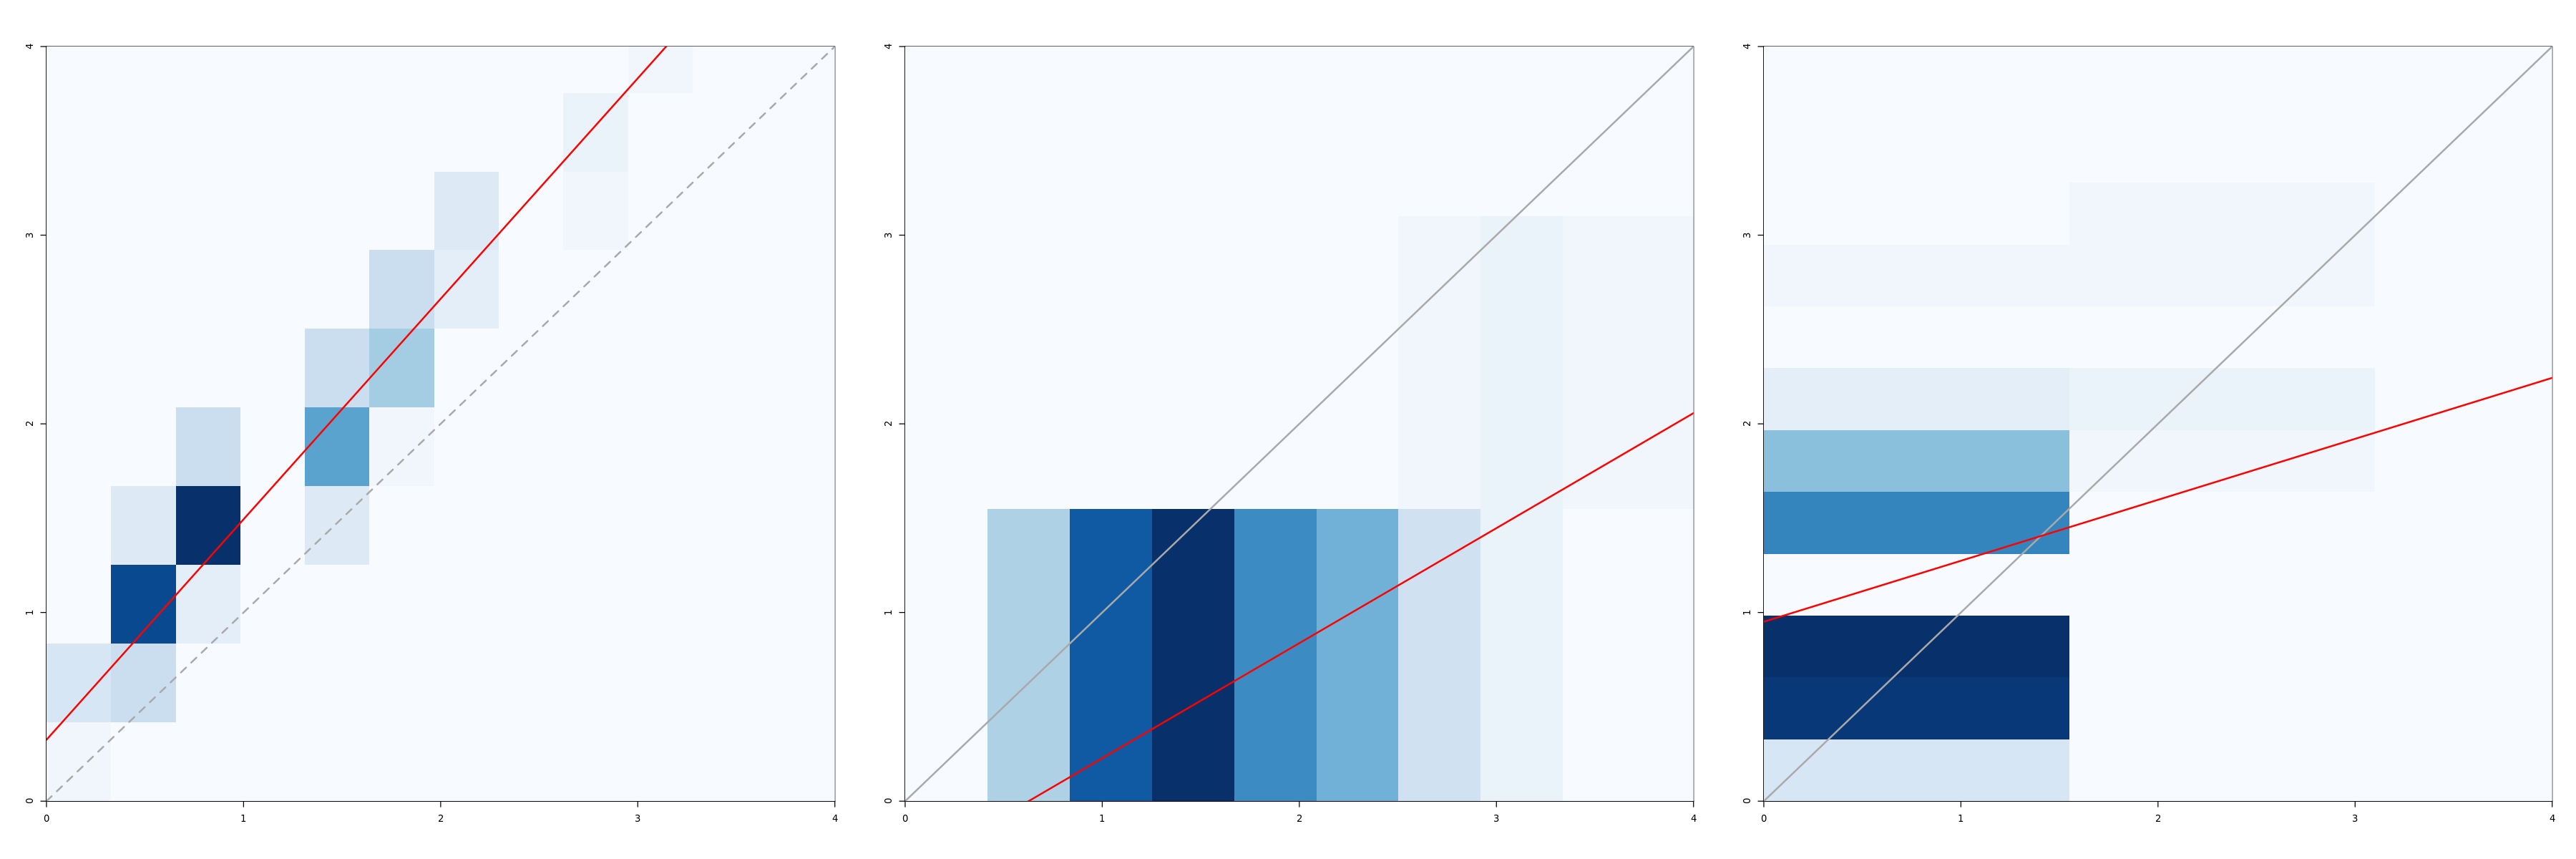

In [ ]:
options(repr.plot.width = 30, repr.plot.height=10)

par(mfrow = c(1,3))
# fissaggio colori
rf <- colorRampPalette(brewer.pal(9,'Blues'))
r <- rf(32)

h2 <- hist2d(common %>% select(wndSpeedA, wndSpeedB), col = r, nbins = c(15,15), xlim = c(0,4), ylim = c(0,4))
lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2, , lty = 2)
abline(lm(common$wndSpeedB  ~ common$wndSpeedA), col = 'red', lwd=2 )

h2 = hist2d(common %>% select(wndSpeedB, wndSpeedC), col = r, nbins = c(15,15), xlim = c(0,4), ylim = c(0,4))
lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2)
abline(lm(common$wndSpeedC  ~ common$wndSpeedB), col = 'red', lwd=2 )

hist2d(common %>% select(wndSpeedC, wndSpeedA), col = r, nbins = c(15,15), xlim = c(0,4), ylim = c(0,4))
lines(seq(0,10,0.1), seq(0,10,0.1), col = 'darkgrey', lwd=2)
abline(lm(common$wndSpeedA  ~ common$wndSpeedC), col = 'red', lwd=2 )


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65805a3-5683-44f7-87a1-3d0b16d3432c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>